<a href="https://colab.research.google.com/github/StromR/Final-Project-Data-Business-Analytics-Operations-Bootcamp/blob/main/marketing_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Guntur Ramadhan <br>
ID CAMP: DBA2101044 <br>
Group: 143 <br>


# **1. Business Understanding**

The Look is a fictional clothing eCommerce site developed by the Looker team. 
<br>
This project will analize marketing department.<br>
I will explain business understanding in this project with 5W1H approach below:
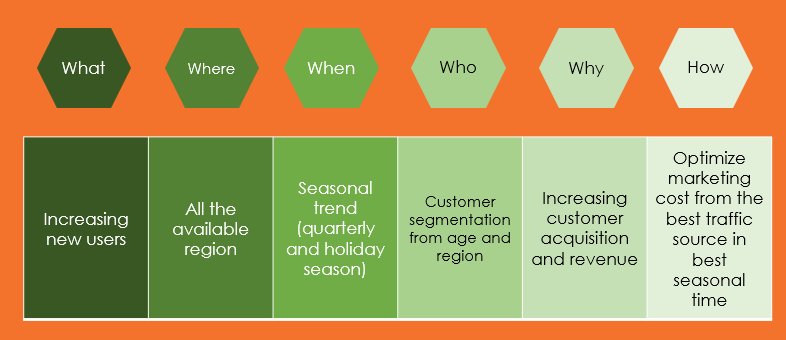



# **2. Data Understanding**
Dataset contains information about users, products, orders, logistics, web events, and campaigns digital marketing. The content of this data set is synthetic, and is provided to practitioners industry for the purpose of product discovery, testing and evaluation. This project will used users and orders dataset.

In [ ]:
# Importing libraries

# Import the numpy and pandas package

import numpy as np
import pandas as pd
from datetime import datetime as dt, timedelta

# Data visualisation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mounting drive for importing dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset Final Project/marketingjoin.csv')
df.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,created_at,order_id,user_id,status,gender_order,created_at_order,returned_at,shipped_at,delivered_at,num_of_item
0,95,Amy,Perry,amyperry@example.com,69,F,Bayern,33882 Gonzales Forge,86179,Augsburg,...,2022-01-21 18:45:00+07,128.0,95.0,Shipped,F,2022-05-28 18:45:00+07,NaN,2022-05-30 14:47:00+07,NaN,4.0
1,102,Alyssa,Smith,alyssasmith@example.net,27,F,Liaoning,80414 Nguyen Row Suite 991,110399,White,...,2019-07-04 16:41:00+07,139.0,102.0,Shipped,F,2019-08-15 16:41:00+07,NaN,2019-08-16 17:18:00+07,NaN,1.0
2,131,Jennifer,Johnson,jenniferjohnson@example.org,32,F,Fujian,56188 Luis Corner,361001,Shenzhen,...,2019-12-01 12:33:00+07,169.0,131.0,Shipped,F,2020-01-13 12:33:00+07,NaN,2020-01-14 09:40:00+07,NaN,1.0
3,148,Susan,Hodges,susanhodges@example.net,49,F,Jilin,5480 Austin Expressway,135099,Hohhot,...,2022-01-28 19:05:00+07,190.0,148.0,Shipped,F,2022-04-07 19:05:00+07,NaN,2022-04-08 04:42:00+07,NaN,4.0
4,148,Susan,Hodges,susanhodges@example.net,49,F,Jilin,5480 Austin Expressway,135099,Hohhot,...,2022-01-28 19:05:00+07,191.0,148.0,Shipped,F,2022-05-14 19:05:00+07,NaN,2022-05-15 08:44:00+07,NaN,1.0


This dataset already contain information both users and orders dataset. I use postgreSQL to join them and import it into a csv file.



Finding basic information of the dataset such as shape, data types, columns,and statistic summary.

In [ ]:
#Checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144526 entries, 0 to 144525
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                144526 non-null  int64  
 1   first_name        144526 non-null  object 
 2   last_name         144526 non-null  object 
 3   email             144526 non-null  object 
 4   age               144526 non-null  int64  
 5   gender            144526 non-null  object 
 6   state             144526 non-null  object 
 7   street_address    144526 non-null  object 
 8   postal_code       144526 non-null  object 
 9   city              143127 non-null  object 
 10  country           144526 non-null  object 
 11  latitude          144526 non-null  float64
 12  longitude         144526 non-null  float64
 13  traffic_source    144526 non-null  object 
 14  created_at        144526 non-null  object 
 15  order_id          124512 non-null  float64
 16  user_id           12

In [ ]:
#Checking shape
df.shape

(144526, 24)

This dataset contains **144526 record with 24 columns**

We can choose which variables we want to use for analysing this dataset to reach the goals that we created in business understanding.
Here are the columns that will be used in this project:
<table>
    <thead>
        <h2>Data fields</h2>
    </thead>
    <tbody>
        <tr>
            <td>id</td>
            <td>&nbsp;</td>
            <td>an id that represents an user account</td>
        </tr>
        <tr>
            <td>age</td>
            <td>&nbsp;</td>
            <td>user's age</td>
        </tr>
        <tr>
            <td>gender</td>
            <td>&nbsp;</td>
            <td>user's gender</td>
        </tr>
        <tr>
            <td>state</td>
            <td>&nbsp;</td>
            <td>user's state</td>
        </tr>
        <tr>
            <td>postal_code</td>
            <td>&nbsp;</td>
            <td>user's postal code</td>
        </tr>
        <tr>
            <td>country</td>
            <td>&nbsp;</td>
            <td>user's country</td>
        </tr>
        <tr>
            <td>latitude</td>
            <td>&nbsp;</td>
            <td>latitude of user location when created their account</td>
        </tr>
        <tr>
            <td>longitude</td>
            <td>&nbsp;</td>
            <td>longitude of user location when created their account</td>
        </tr>
        <tr>
            <td>traffic_source</td>
            <td>&nbsp;</td>
            <td>the origin through which people found the look</td>
        </tr>
        <tr>
            <td>created_at</td>
            <td>&nbsp;</td>
            <td>timestamp when the account created</td>
        </tr>
        <tr>
            <td>order_id</td>
            <td>&nbsp;</td>
            <td>an id that represents an order</td>
        </tr>
        <tr>
            <td>status</td>
            <td>&nbsp;</td>
            <td>the status of order (shipped, completed, cancelled, processing)</td>
        </tr>
        <tr>
            <td>created_at_order</td>
            <td>&nbsp;</td>
            <td>timestamp when the order created</td>
        </tr>
        <tr>
            <td>num_of_item</td>
            <td>&nbsp;</td>
            <td>total items in an order </td>
        </tr>
    </tbody>
</table>

Dropping columns that **will not be used** in this project

In [ ]:
# Drop columns
df = df.drop(['first_name', 'last_name', 'email', 'city', 'user_id', 'street_address', 'gender_order', 'returned_at', 'shipped_at', 'delivered_at'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144526 entries, 0 to 144525
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                144526 non-null  int64  
 1   age               144526 non-null  int64  
 2   gender            144526 non-null  object 
 3   state             144526 non-null  object 
 4   postal_code       144526 non-null  object 
 5   country           144526 non-null  object 
 6   latitude          144526 non-null  float64
 7   longitude         144526 non-null  float64
 8   traffic_source    144526 non-null  object 
 9   created_at        144526 non-null  object 
 10  order_id          124512 non-null  float64
 11  status            124512 non-null  object 
 12  created_at_order  124512 non-null  object 
 13  num_of_item       124512 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 15.4+ MB


Because order_id and num_of_item **detected** as float we need to **convert** it to integer. Before we **change the datatype** we need to **check missing values first**

In [ ]:
# Checking missing values
df.isnull().sum()

id                      0
age                     0
gender                  0
state                   0
postal_code             0
country                 0
latitude                0
longitude               0
traffic_source          0
created_at              0
order_id            20014
status              20014
created_at_order    20014
num_of_item         20014
dtype: int64

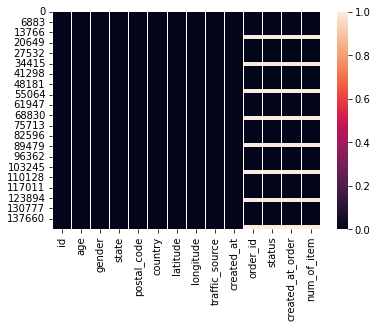

In [ ]:
#Visualize the missing values
import seaborn as sns
sns.heatmap(df.isnull())

There are **20014 missing values** in each order_id, status, creater_at_order and num_of_an_item

In [ ]:
#After that we filled the missing values with 0
df = df.fillna(0)

# Checking missing values again for validation
df.isnull().sum()

id                  0
age                 0
gender              0
state               0
postal_code         0
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
order_id            0
status              0
created_at_order    0
num_of_item         0
dtype: int64

In [ ]:
#Checking duplicated record
print((df.duplicated()).sum())

0


There is not duplicated record

In [ ]:
#Finally we can change the datatype
df = df.astype({'order_id': 'int64', 'num_of_item': 'int64'}, errors='raise')

#Convert object to datetime.
df['created_at_order'] = pd.to_datetime(df['created_at_order'], yearfirst=True, errors='coerce').dt.tz_convert(None)
df['created_at'] = pd.to_datetime(df['created_at'], yearfirst=True, errors='coerce').dt.tz_convert(None)

#Checking the data type
df.dtypes

id                           int64
age                          int64
gender                      object
state                       object
postal_code                 object
country                     object
latitude                   float64
longitude                  float64
traffic_source              object
created_at          datetime64[ns]
order_id                     int64
status                      object
created_at_order    datetime64[ns]
num_of_item                  int64
dtype: object

In [ ]:
#Summary statistic of dataframe
df.describe()

,id,age,latitude,longitude,order_id,num_of_item
count,144526.000000,144526.000000,144526.000000,144526.000000,144526.000000,144526.000000
mean,50037.892843,41.035260,28.248635,25.388704,53635.202856,1.248966
std,28825.523122,17.012637,22.153824,89.682722,39691.872121,0.897585
min,1.000000,12.000000,-43.253132,-158.164931,0.000000,0.000000
25%,25098.250000,26.000000,26.083985,-50.000131,16118.250000,1.000000
50%,50063.500000,41.000000,35.231480,4.837396,52249.500000,1.000000
75%,74963.000000,56.000000,40.724357,116.407581,88380.750000,2.000000
max,100000.000000,70.000000,64.865194,153.543292,124512.000000,4.000000


# **3. Data Preparation**

### Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.



In [ ]:
df.value_counts()

id      age  gender  state                postal_code  country        latitude    longitude    traffic_source  created_at           order_id  status      created_at_order     num_of_item
1       30   M       Gyeonggi-do          472-881      South Korea     37.702753   127.197980  Search          2019-06-11 17:47:00  1         Complete    2019-07-17 17:47:00  4              1
66647   36   F       Heilongjiang         150010       China           45.784520   126.581242  Organic         2020-10-09 08:36:00  83088     Processing  2022-01-28 08:36:00  1              1
66643   56   F       Nordrhein-Westfalen  53894        Germany         50.591257   6.647776    Search          2021-06-19 08:09:00  83082     Cancelled   2022-03-19 08:09:00  3              1
66644   48   F       Shanxi               45012        China           37.851085   113.476525  Search          2019-11-25 05:32:00  83083     Shipped     2020-12-10 05:32:00  3              1
66645   46   M       Guangdong            528

In [ ]:
df_c = (df.groupby(['country','state'])['state'].count().reset_index(name='states count'))
df_c.sort_values('states count',  ascending=False).head(5)

,country,state,states count
45,China,Guangdong,7508
175,United Kingdom,England,5815
183,United States,California,5218
222,United States,Texas,3624
64,China,Shanghai,3621


In [ ]:
df_t = (df.groupby(['traffic_source'])['traffic_source'].count().reset_index(name='traffic source count'))
df_t.sort_values('traffic source count',  ascending=False)

,traffic_source,traffic source count
4,Search,101361
3,Organic,21529
2,Facebook,8841
1,Email,7077
0,Display,5718


In [ ]:
df_h = (df.groupby(df['created_at'].dt.hour)['created_at'].count().reset_index(name='created_at count'))
df_h.sort_values('created_at count',  ascending=False)

,created_at,created_at count
8,8,7823
14,14,7779
7,7,7702
6,6,7698
5,5,7696
12,12,7691
16,16,7666
4,4,7650
11,11,7646
18,18,7626


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


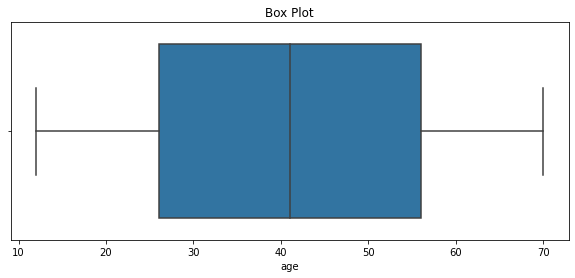

In [ ]:
from statsmodels.graphics.gofplots import qqplot
def Box_plots(da):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(da)
    plt.show()
Box_plots(df['age'])

There are no outlier in age

In [ ]:
print('Min and Max created at date')
df['created_at'].agg(['min', 'max'])

Min and Max created at date


min   2019-01-02 00:07:00.000000
max   2022-06-01 19:18:13.756820
Name: created_at, dtype: datetime64[ns]

In [ ]:
print('Min and Max created at order date')
df['created_at_order'].agg(['min', 'max'])

Min and Max created at order date


min   1970-01-01 00:00:00.000000
max   2022-06-02 19:18:13.756820
Name: created_at_order, dtype: datetime64[ns]

In [ ]:
df.loc[df["created_at_order"] > "2019-01-02"]

,id,age,gender,state,postal_code,country,latitude,longitude,traffic_source,created_at,order_id,status,created_at_order,num_of_item
0,95,69,F,Bayern,86179,Germany,48.300084,10.919895,Email,2022-01-21 11:45:00,128,Shipped,2022-05-28 11:45:00,4
1,102,27,F,Liaoning,110399,China,42.017284,122.783515,Search,2019-07-04 09:41:00,139,Shipped,2019-08-15 09:41:00,1
2,131,32,F,Fujian,361001,China,24.459550,118.070113,Search,2019-12-01 05:33:00,169,Shipped,2020-01-13 05:33:00,1
3,148,49,F,Jilin,135099,China,42.523291,125.651574,Search,2022-01-28 12:05:00,190,Shipped,2022-04-07 12:05:00,4
4,148,49,F,Jilin,135099,China,42.523291,125.651574,Search,2022-01-28 12:05:00,191,Shipped,2022-05-14 12:05:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141964,99598,67,M,Henan,450052,China,34.750025,113.644270,Search,2022-05-04 15:10:00,123990,Processing,2022-05-16 15:10:00,3
141965,99663,64,M,Guangdong,528251,China,23.008955,113.196905,Search,2019-06-21 14:06:00,124075,Processing,2021-11-18 14:06:00,2
141966,99694,28,M,England,DY5,United Kingdom,52.482845,-2.122217,Search,2020-12-17 04:30:00,124115,Processing,2021-12-16 04:30:00,1
141967,99721,61,M,Western Australia,6104,Australia,-31.941615,115.934480,Email,2019-06-07 01:03:00,124157,Processing,2021-06-03 01:03:00,1


There are 20014 record with created_at_order = 1970-01-01 00:00:00+00:00 which means they only created account and doesn't order anything. I'll leave it that way, since when it filled with mode will interfere the analize

In [ ]:
a = df.loc[df["created_at_order"] > "2019-01-02"]
a.agg(['min', 'max'])

,id,age,gender,state,postal_code,country,latitude,longitude,traffic_source,created_at,order_id,status,created_at_order,num_of_item
min,1,12,F,Acre,002-8054,Australia,-43.160756,-158.164931,Display,2019-01-02 00:07:00.000000,1,Cancelled,2019-01-05 08:01:00.000000,1
max,100000,70,M,Île-de-France,YO8,United States,64.865194,153.533010,Search,2022-06-01 19:18:13.756820,124512,Shipped,2022-06-02 19:18:13.756820,4


<table>
    <thead>
        <h2>Date</h2>
    </thead>
    <tbody>
        <tr>
            <td>Date</td>
            <td>created_at</td>
            <td>created_at_order</td>
        </tr>
        <tr>
            <td>Min</td>
            <td>2019-01-02 00:07:00</td>
            <td>2019-01-05 08:01:00</td>
        </tr>
        <tr>
            <td>Max</td>
            <td>2022-06-01 19:18:13</td>
            <td>2022-06-02 19:18:13</td>
        </tr>
</table>
<br>
The data shows that the first account created at 2019-01-02 00:07:00 and last account created at 2022-06-01 19:18:13. While the first order was at 2019-01-05 08:01:00 and last order was at 2022-06-02 19:18:13  

F    72285
M    72241
Name: gender, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


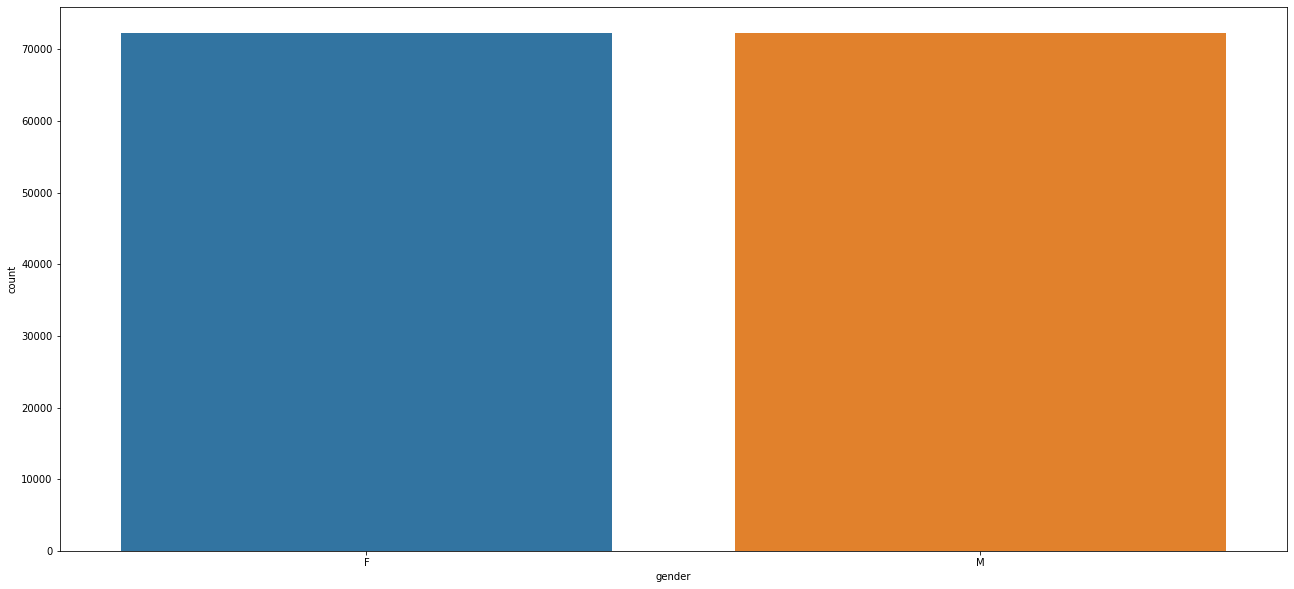

In [ ]:
print(df['gender'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['gender'])
plt.show()

Search      101361
Organic      21529
Facebook      8841
Email         7077
Display       5718
Name: traffic_source, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


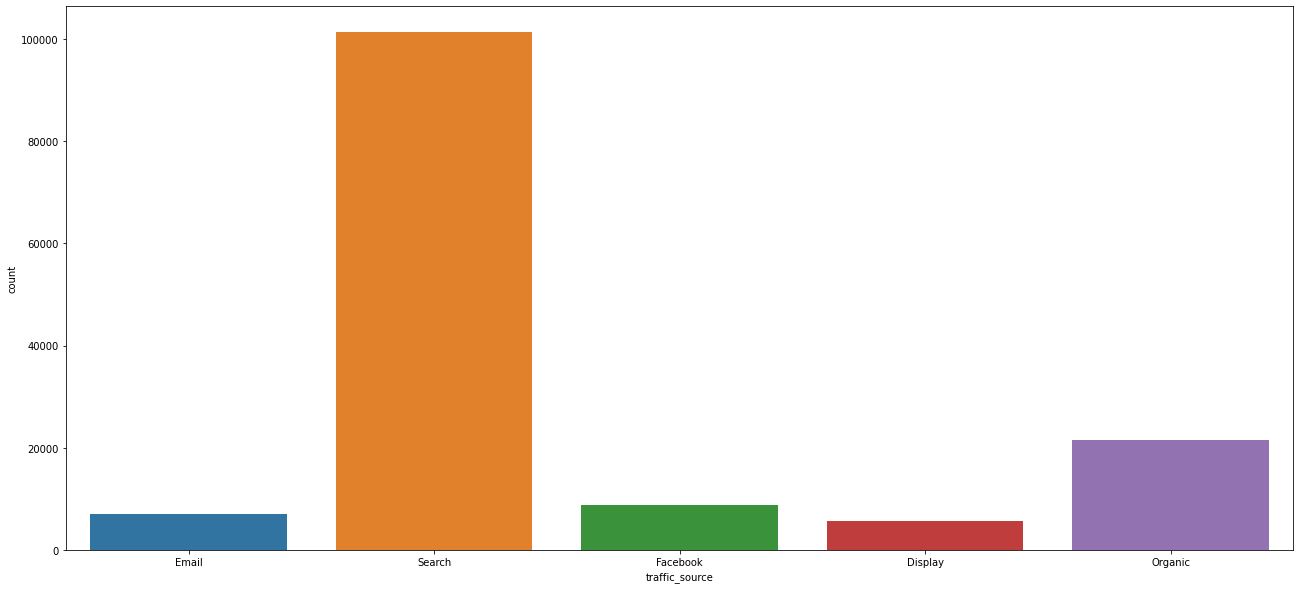

In [ ]:
print(df['traffic_source'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['traffic_source'])
plt.show()

China             49229
United States     31920
Brasil            21142
South Korea        7677
France             6920
United Kingdom     6637
Germany            6224
Spain              5984
Japan              3430
Australia          3270
Belgium            1748
Poland              298
Colombia             28
Austria              10
España                9
Name: country, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


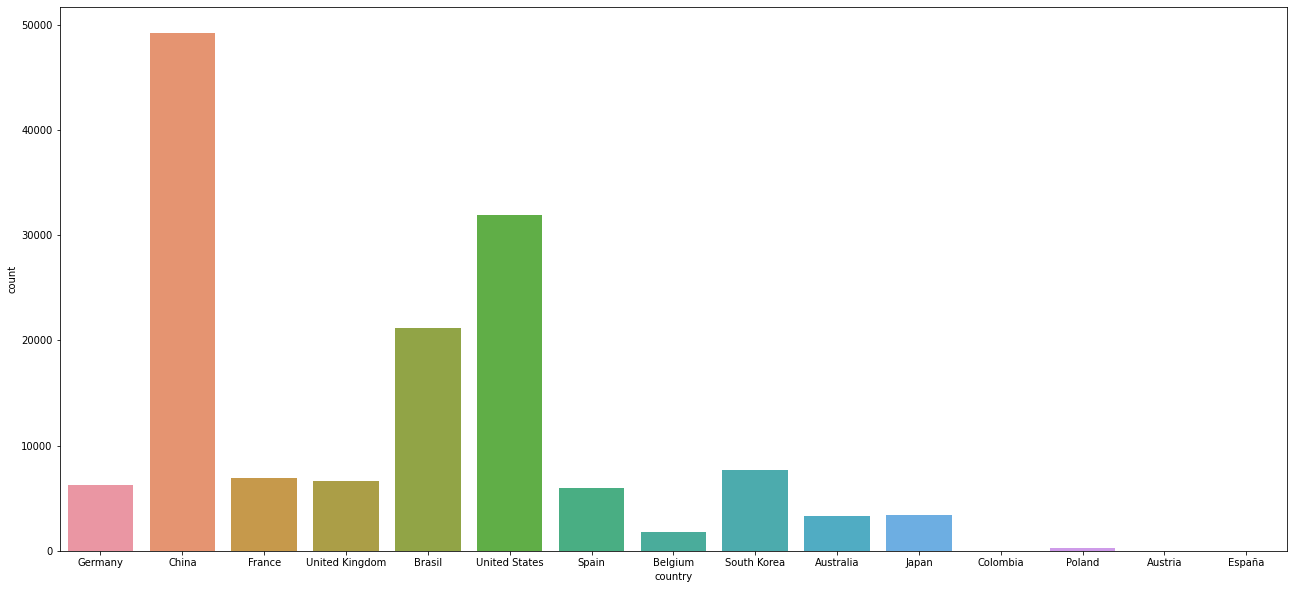

In [ ]:
print(df['country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['country'])
plt.show()

Guangdong     7508
England       5815
California    5218
Texas         3624
Shanghai      3621
Name: state, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


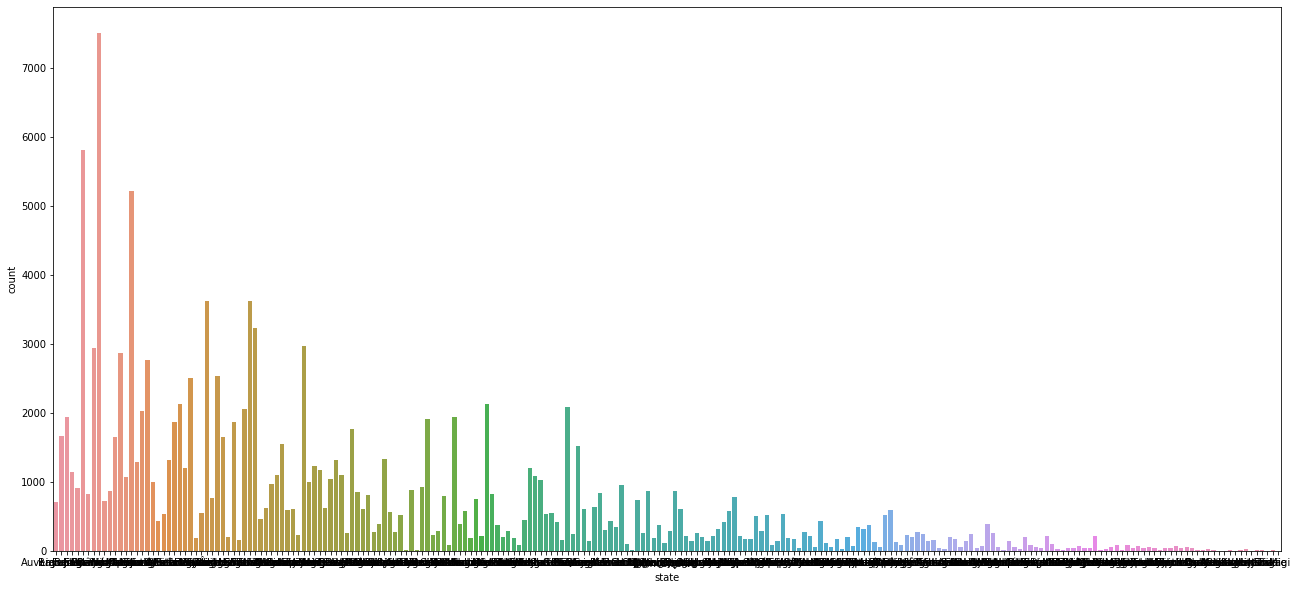

In [ ]:
print(df['state'].value_counts().head(5))
plt.figure(figsize=(22,10))
sns.countplot(df['state'])
plt.show()

In [ ]:
df['day'] = pd.DatetimeIndex(df['created_at']).day
df['month'] = pd.DatetimeIndex(df['created_at']).month
print(df['day'].mode())
print(df['month'].mode())

0    28
dtype: int64
0    5
dtype: int64


#### Transform Data
Transform data for modeling with prophet model developed by facebook.

##### Data User Created per Day

In [ ]:
df_day = df['created_at'].groupby(df['created_at'].dt.floor('d')).size().reset_index(name='count')
df_day.head()

,created_at,count
0,2019-01-02,90
1,2019-01-03,109
2,2019-01-04,105
3,2019-01-05,127
4,2019-01-06,107


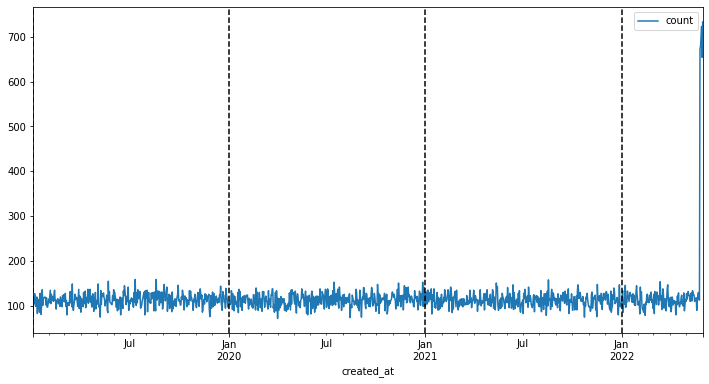

In [ ]:
ax = df_day.plot(x='created_at', y='count', figsize=(12,6))
xcoords = ['2019-01-01', '2020-01-01','2021-01-01', '2022-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

To make the forecast more accurate i decided to remove the data from 2022-05-27 till the newest because there is anomaly seen in graph above.

In [ ]:
df_day = df_day.drop(df_day[df_day['created_at'] >= '2022-05-27'].index)

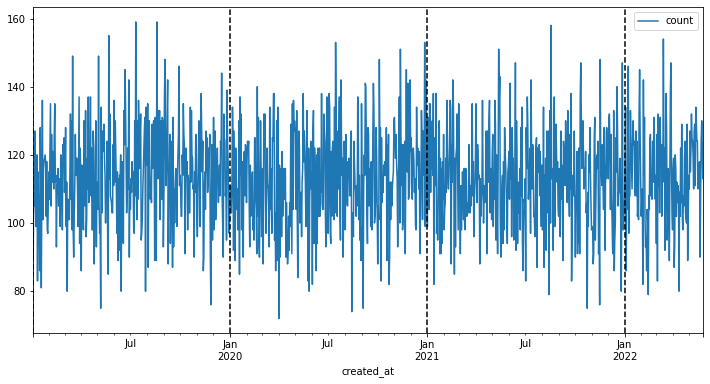

In [ ]:
ax = df_day.plot(x='created_at', y='count', figsize=(12,6))
xcoords = ['2019-01-01', '2020-01-01','2021-01-01', '2022-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

##### Transform data based on traffic source

In [ ]:
df_day_ts = df['created_at'].groupby([df['created_at'].dt.floor('d'), df['traffic_source']]).size().reset_index(name='count')
df_day_ts

,created_at,traffic_source,count
0,2019-01-02,Display,7
1,2019-01-02,Email,6
2,2019-01-02,Facebook,2
3,2019-01-02,Organic,13
4,2019-01-02,Search,62
...,...,...,...
6135,2022-06-01,Display,22
6136,2022-06-01,Email,56
6137,2022-06-01,Facebook,43
6138,2022-06-01,Organic,78


In [ ]:
df_day_ts = df_day_ts.drop(df_day_ts[df_day_ts['created_at'] >= '2022-05-27'].index)

###### Display

In [ ]:
df_display = df_day_ts[df_day_ts['traffic_source'] == 'Display']
df_display = df_display.drop('traffic_source', 1)
df_display.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,created_at,count
0,2019-01-02,7
5,2019-01-03,3
10,2019-01-04,4
15,2019-01-05,4
20,2019-01-06,6


In [ ]:
df_display = df_display.set_index('created_at').asfreq('D')
df_display = df_display.fillna(0)

In [ ]:
df_display.reset_index(inplace=True)
df_display = df_display.rename({'index': 'created_at'}, axis=1)
df_display.head()

,created_at,count
0,2019-01-02,7.0
1,2019-01-03,3.0
2,2019-01-04,4.0
3,2019-01-05,4.0
4,2019-01-06,6.0


###### Facebook

In [ ]:
df_fb = df_day_ts[df_day_ts['traffic_source'] == 'Facebook']
df_fb = df_fb.drop('traffic_source', 1)
df_fb.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,created_at,count
2,2019-01-02,2
7,2019-01-03,18
12,2019-01-04,2
17,2019-01-05,10
22,2019-01-06,7


In [ ]:
df_fb = df_fb.set_index('created_at').asfreq('D')
df_fb = df_fb.fillna(0)

In [ ]:
df_fb.reset_index(inplace=True)
df_fb = df_fb.rename({'index': 'created_at'}, axis=1)
df_fb.head()

,created_at,count
0,2019-01-02,2.0
1,2019-01-03,18.0
2,2019-01-04,2.0
3,2019-01-05,10.0
4,2019-01-06,7.0


###### Organic

In [ ]:
df_organic = df_day_ts[df_day_ts['traffic_source'] == 'Organic']
df_organic = df_organic.drop('traffic_source', 1)
df_organic.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,created_at,count
3,2019-01-02,13
8,2019-01-03,11
13,2019-01-04,25
18,2019-01-05,18
23,2019-01-06,14


In [ ]:
df_organic = df_organic.set_index('created_at').asfreq('D')
df_organic = df_organic.fillna(0)

In [ ]:
df_organic.reset_index(inplace=True)
df_organic = df_organic.rename({'index': 'created_at'}, axis=1)
df_organic.head()

,created_at,count
0,2019-01-02,13
1,2019-01-03,11
2,2019-01-04,25
3,2019-01-05,18
4,2019-01-06,14


###### Search

In [ ]:
df_search = df_day_ts[df_day_ts['traffic_source'] == 'Search']
df_search = df_search.drop('traffic_source', 1)
df_search.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,created_at,count
4,2019-01-02,62
9,2019-01-03,70
14,2019-01-04,70
19,2019-01-05,93
24,2019-01-06,71


In [ ]:
df_search = df_search.set_index('created_at').asfreq('D')
df_search = df_search.fillna(0)

In [ ]:
df_search.reset_index(inplace=True)
df_search = df_search.rename({'index': 'created_at'}, axis=1)
df_search.head()

,created_at,count
0,2019-01-02,62
1,2019-01-03,70
2,2019-01-04,70
3,2019-01-05,93
4,2019-01-06,71


###### Email

In [ ]:
df_email = df_day_ts[df_day_ts['traffic_source'] == 'Email']
df_email = df_email.drop('traffic_source', 1)
df_email.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,created_at,count
1,2019-01-02,6
6,2019-01-03,7
11,2019-01-04,4
16,2019-01-05,2
21,2019-01-06,9


In [ ]:
df_email = df_email.set_index('created_at').asfreq('D')
df_email = df_email.fillna(0)

In [ ]:
df_email.reset_index(inplace=True)
df_email = df_email.rename({'index': 'created_at'}, axis=1)
df_email.head()

,created_at,count
0,2019-01-02,6.0
1,2019-01-03,7.0
2,2019-01-04,4.0
3,2019-01-05,2.0
4,2019-01-06,9.0


# **4. Modeling**


### Forecasting per day

In [ ]:
df_day.rename(columns={'created_at': 'ds', 'count': 'y'}, inplace = True)
df_day.head()

,ds,y
0,2019-01-02,90
1,2019-01-03,109
2,2019-01-04,105
3,2019-01-05,127
4,2019-01-06,107


In [ ]:
from fbprophet import Prophet
m = Prophet(interval_width=0.95) #by default is 80%
model = m.fit(df_day)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=90)
future.head()

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-05
4,2019-01-06


In [ ]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,113.023823,85.098332,140.183610,113.023823,113.023823,0.711702,0.711702,0.711702,0.387971,0.387971,0.387971,0.323732,0.323732,0.323732,0.0,0.0,0.0,113.735525
1,2019-01-03,113.024093,85.206304,143.206412,113.024093,113.024093,-0.567455,-0.567455,-0.567455,-0.858276,-0.858276,-0.858276,0.290820,0.290820,0.290820,0.0,0.0,0.0,112.456638
2,2019-01-04,113.024364,86.726564,139.335116,113.024364,113.024364,-0.250015,-0.250015,-0.250015,-0.502683,-0.502683,-0.502683,0.252668,0.252668,0.252668,0.0,0.0,0.0,112.774349
3,2019-01-05,113.024634,85.605581,143.231259,113.024634,113.024634,0.803143,0.803143,0.803143,0.593180,0.593180,0.593180,0.209963,0.209963,0.209963,0.0,0.0,0.0,113.827777
4,2019-01-06,113.024905,86.494176,142.691066,113.024905,113.024905,0.361338,0.361338,0.361338,0.197830,0.197830,0.197830,0.163509,0.163509,0.163509,0.0,0.0,0.0,113.386243


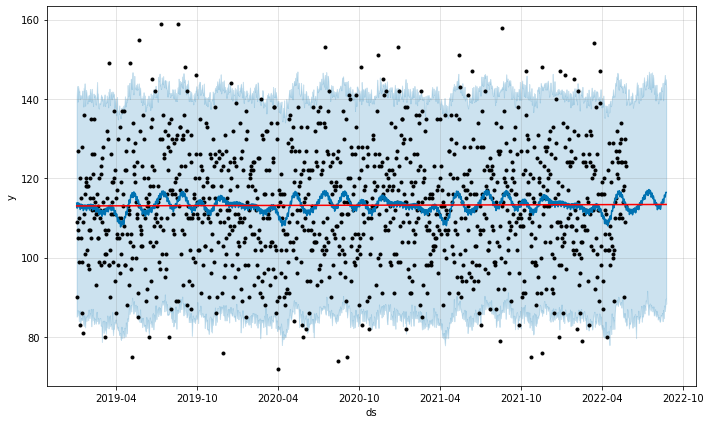

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
plot1 = m.plot(forecast);
a = add_changepoints_to_plot(plot1.gca(),m,forecast)

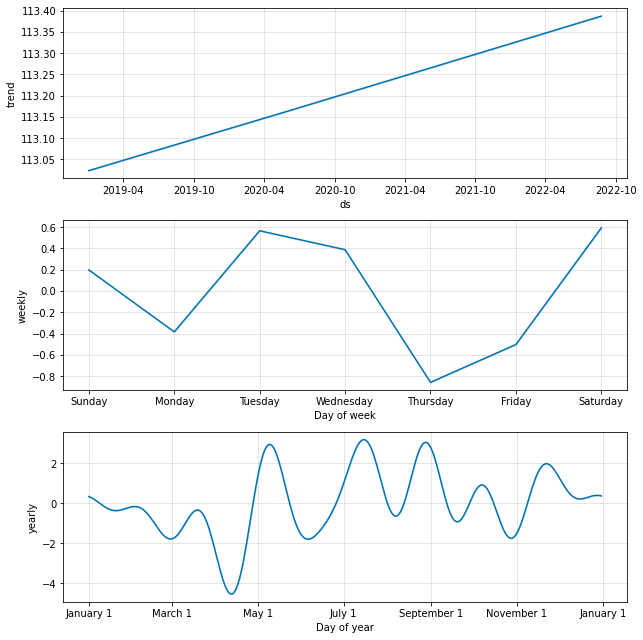

In [ ]:
plot2 = m.plot_components(forecast);

### Forecast new user based on traffic source

#### Display

In [ ]:
df_display.rename(columns={'created_at': 'ds', 'count': 'y'}, inplace = True)
df_display.head()

,ds,y
0,2019-01-02,7.0
1,2019-01-03,3.0
2,2019-01-04,4.0
3,2019-01-05,4.0
4,2019-01-06,6.0


In [ ]:
from fbprophet import Prophet
m_dp = Prophet(interval_width=0.95) #by default is 80%
model_dp = m_dp.fit(df_display)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dp = m_dp.make_future_dataframe(periods=90)
future_dp.head()

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-05
4,2019-01-06


In [ ]:
forecast_dp = m_dp.predict(future_dp)
forecast_dp.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,4.353229,-1.753220,9.505088,4.353229,4.353229,-0.475500,-0.475500,-0.475500,-0.363135,-0.363135,-0.363135,-0.112365,-0.112365,-0.112365,0.0,0.0,0.0,3.877728
1,2019-01-03,4.353422,-0.829041,10.043396,4.353422,4.353422,0.177128,0.177128,0.177128,0.288064,0.288064,0.288064,-0.110936,-0.110936,-0.110936,0.0,0.0,0.0,4.530550
2,2019-01-04,4.353616,-1.814392,9.291513,4.353616,4.353616,-0.254032,-0.254032,-0.254032,-0.146685,-0.146685,-0.146685,-0.107346,-0.107346,-0.107346,0.0,0.0,0.0,4.099584
3,2019-01-05,4.353810,-1.413446,9.308225,4.353810,4.353810,-0.294070,-0.294070,-0.294070,-0.192385,-0.192385,-0.192385,-0.101685,-0.101685,-0.101685,0.0,0.0,0.0,4.059739
4,2019-01-06,4.354003,-1.133990,10.037220,4.354003,4.354003,-0.027096,-0.027096,-0.027096,0.066979,0.066979,0.066979,-0.094075,-0.094075,-0.094075,0.0,0.0,0.0,4.326908


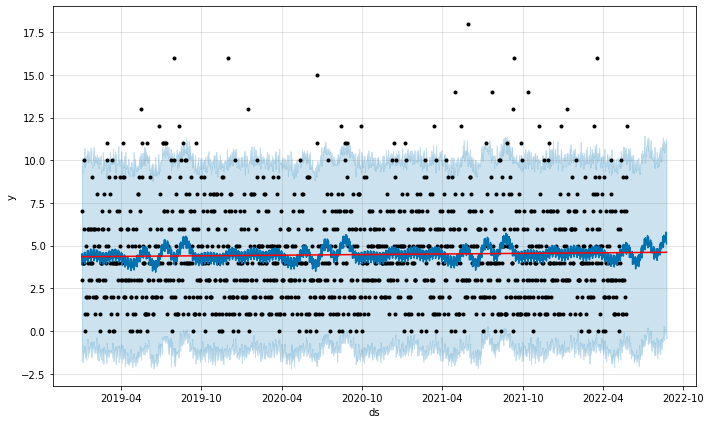

In [ ]:
plot1_dp = m_dp.plot(forecast_dp);
a_dp = add_changepoints_to_plot(plot1_dp.gca(),m_dp,forecast_dp)

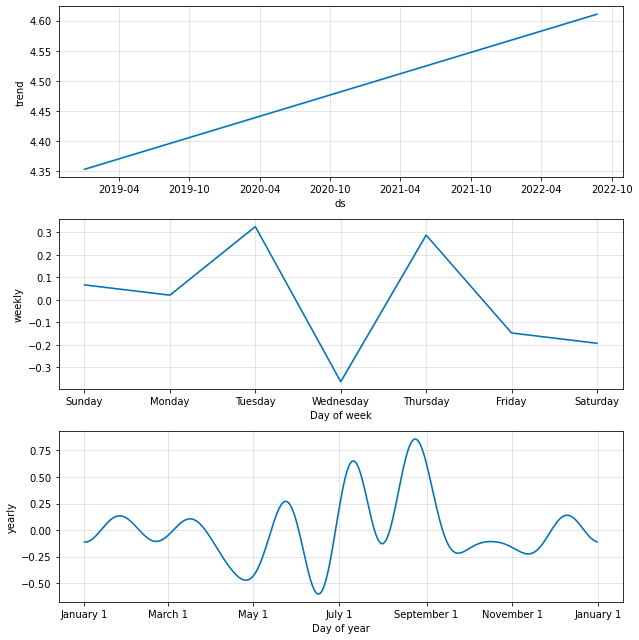

In [ ]:
plot2_dp = m_dp.plot_components(forecast_dp);

#### Facebook

In [ ]:
df_fb.rename(columns={'created_at': 'ds', 'count': 'y'}, inplace = True)
df_fb.head()

,ds,y
0,2019-01-02,2.0
1,2019-01-03,18.0
2,2019-01-04,2.0
3,2019-01-05,10.0
4,2019-01-06,7.0


In [ ]:
m_fb = Prophet(interval_width=0.95) #by default is 80%
model_fb = m_fb.fit(df_fb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_fb = m_fb.make_future_dataframe(periods=90)
future_fb.head()

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-05
4,2019-01-06


In [ ]:
forecast_fb = m_fb.predict(future_fb)
forecast_fb.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,6.997238,0.635595,14.713030,6.997238,6.997238,0.598482,0.598482,0.598482,0.467488,0.467488,0.467488,0.130994,0.130994,0.130994,0.0,0.0,0.0,7.595720
1,2019-01-03,6.996978,-0.250577,14.522723,6.996978,6.996978,0.042721,0.042721,0.042721,-0.119323,-0.119323,-0.119323,0.162044,0.162044,0.162044,0.0,0.0,0.0,7.039699
2,2019-01-04,6.996718,0.163566,14.292467,6.996718,6.996718,0.212954,0.212954,0.212954,0.019682,0.019682,0.019682,0.193272,0.193272,0.193272,0.0,0.0,0.0,7.209673
3,2019-01-05,6.996458,0.507490,15.461266,6.996458,6.996458,0.535575,0.535575,0.535575,0.312382,0.312382,0.312382,0.223193,0.223193,0.223193,0.0,0.0,0.0,7.532033
4,2019-01-06,6.996198,-0.428968,14.441847,6.996198,6.996198,-0.263556,-0.263556,-0.263556,-0.513880,-0.513880,-0.513880,0.250325,0.250325,0.250325,0.0,0.0,0.0,6.732642


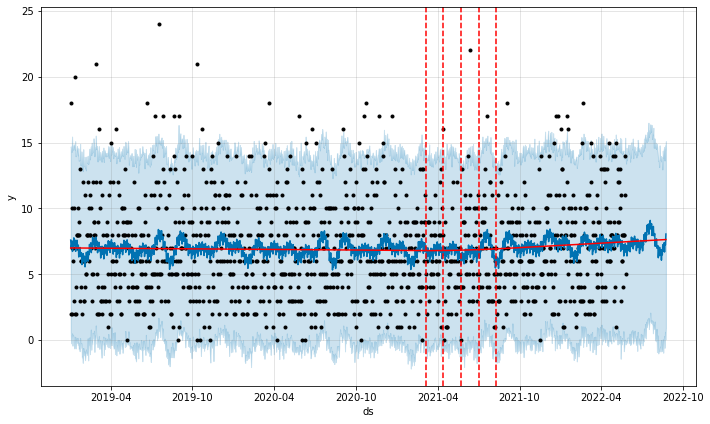

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
plot1_fb = m_fb.plot(forecast_fb);
a_fb = add_changepoints_to_plot(plot1_fb.gca(),m_fb,forecast_fb)

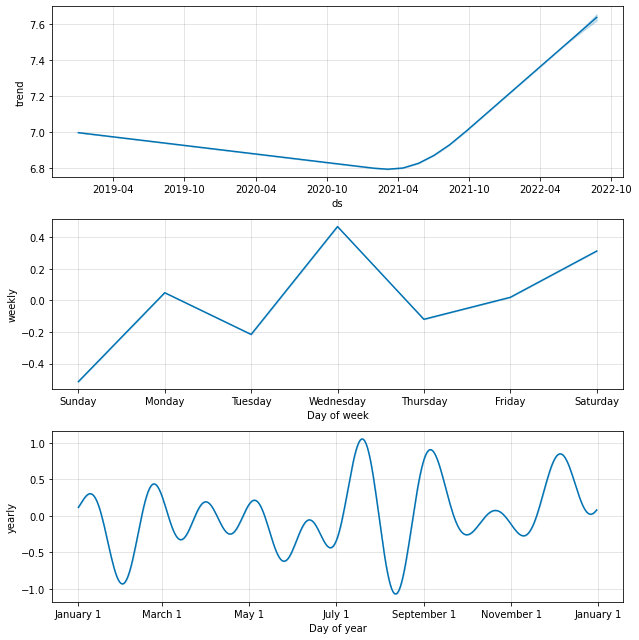

In [ ]:
plot2_fb = m_fb.plot_components(forecast_fb);

#### Organic

In [ ]:
df_organic.rename(columns={'created_at': 'ds', 'count': 'y'}, inplace = True)
df_organic.head()

,ds,y
0,2019-01-02,13
1,2019-01-03,11
2,2019-01-04,25
3,2019-01-05,18
4,2019-01-06,14


In [ ]:
from fbprophet import Prophet
m_organic = Prophet(interval_width=0.95) #by default is 80%
model_organic = m_organic.fit(df_organic)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_organic = m_organic.make_future_dataframe(periods=90)
future_organic.head()

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-05
4,2019-01-06


In [ ]:
forecast_organic = m_organic.predict(future_organic)
forecast_organic.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,17.092339,7.671646,29.987524,17.092339,17.092339,1.120420,1.120420,1.120420,0.248016,0.248016,0.248016,0.872404,0.872404,0.872404,0.0,0.0,0.0,18.212759
1,2019-01-03,17.092147,7.055532,28.627928,17.092147,17.092147,0.982718,0.982718,0.982718,0.086056,0.086056,0.086056,0.896661,0.896661,0.896661,0.0,0.0,0.0,18.074864
2,2019-01-04,17.091954,7.210417,28.665595,17.091954,17.091954,1.031851,1.031851,1.031851,0.119749,0.119749,0.119749,0.912102,0.912102,0.912102,0.0,0.0,0.0,18.123804
3,2019-01-05,17.091761,6.317882,29.453469,17.091761,17.091761,0.667171,0.667171,0.667171,-0.251972,-0.251972,-0.251972,0.919143,0.919143,0.919143,0.0,0.0,0.0,17.758932
4,2019-01-06,17.091568,7.485821,29.285296,17.091568,17.091568,0.836853,0.836853,0.836853,-0.081517,-0.081517,-0.081517,0.918370,0.918370,0.918370,0.0,0.0,0.0,17.928421


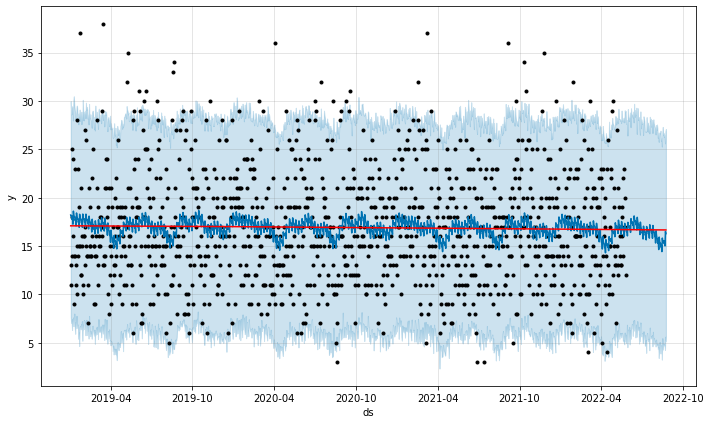

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
plot1_organic = m_organic.plot(forecast_organic);
a_organic = add_changepoints_to_plot(plot1_organic.gca(),m_organic,forecast_organic)

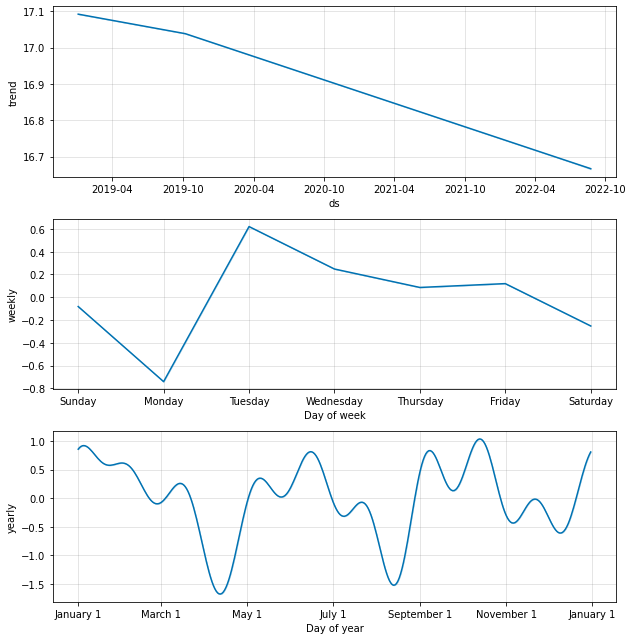

In [ ]:
plot2_organic = m_organic.plot_components(forecast_organic);

#### Search

In [ ]:
df_search.rename(columns={'created_at': 'ds', 'count': 'y'}, inplace = True)
df_search.head()

,ds,y
0,2019-01-02,62
1,2019-01-03,70
2,2019-01-04,70
3,2019-01-05,93
4,2019-01-06,71


In [ ]:
m_search = Prophet(interval_width=0.95) #by default is 80%
model_search = m_search.fit(df_search)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_search = m_search.make_future_dataframe(periods=90)
future_search.head()

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-05
4,2019-01-06


In [ ]:
forecast_search = m_search.predict(future_search)
forecast_search.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,79.405742,56.175104,103.674531,79.405742,79.405742,-0.557269,-0.557269,-0.557269,-0.158206,-0.158206,-0.158206,-0.399063,-0.399063,-0.399063,0.0,0.0,0.0,78.848473
1,2019-01-03,79.405577,56.268127,100.924096,79.405577,79.405577,-1.373100,-1.373100,-1.373100,-0.871178,-0.871178,-0.871178,-0.501922,-0.501922,-0.501922,0.0,0.0,0.0,78.032477
2,2019-01-04,79.405412,55.857340,101.832179,79.405412,79.405412,-1.098560,-1.098560,-1.098560,-0.490209,-0.490209,-0.490209,-0.608351,-0.608351,-0.608351,0.0,0.0,0.0,78.306851
3,2019-01-05,79.405247,55.837779,104.383082,79.405247,79.405247,0.013853,0.013853,0.013853,0.729463,0.729463,0.729463,-0.715610,-0.715610,-0.715610,0.0,0.0,0.0,79.419099
4,2019-01-06,79.405082,54.940299,103.779208,79.405082,79.405082,-0.052406,-0.052406,-0.052406,0.768467,0.768467,0.768467,-0.820872,-0.820872,-0.820872,0.0,0.0,0.0,79.352676


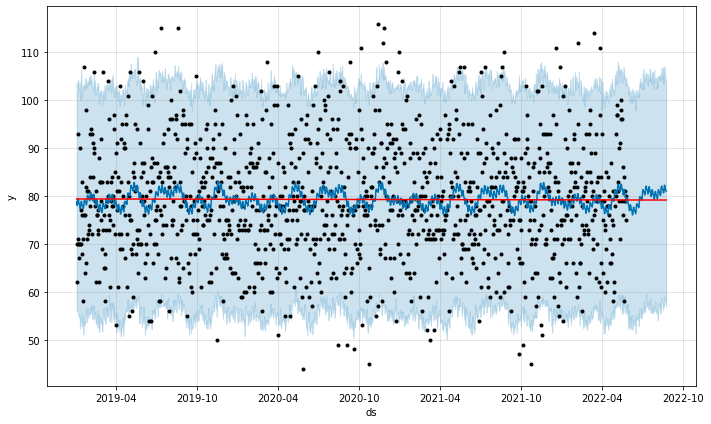

In [ ]:
plot1_search = m_search.plot(forecast_search);
a_search = add_changepoints_to_plot(plot1_search.gca(),m_search,forecast_search)

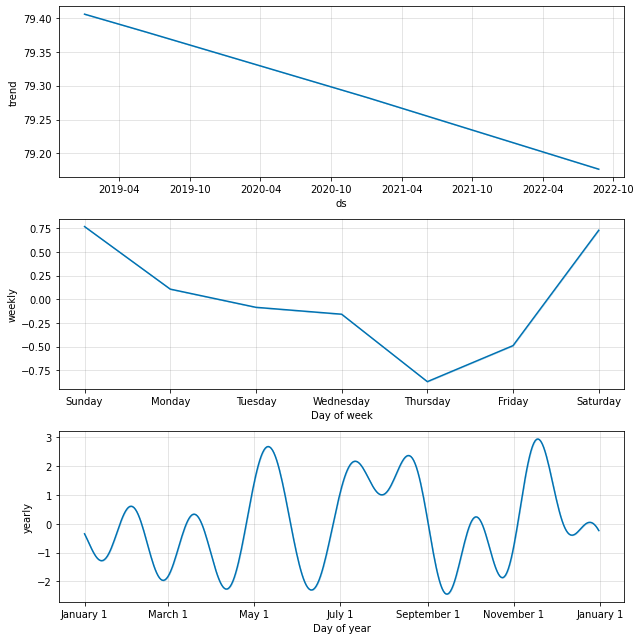

In [ ]:
plot2_search = m_search.plot_components(forecast_search);

#### Email

In [ ]:
df_email.rename(columns={'created_at': 'ds', 'count': 'y'}, inplace = True)
df_email.head()

,ds,y
0,2019-01-02,6.0
1,2019-01-03,7.0
2,2019-01-04,4.0
3,2019-01-05,2.0
4,2019-01-06,9.0


In [ ]:
m_email = Prophet(interval_width=0.95) #by default is 80%
model_email = m_email.fit(df_email)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_email = m.make_future_dataframe(periods=90)
future_email.head()

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-05
4,2019-01-06


In [ ]:
forecast_email = m_email.predict(future_email)
forecast_email.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,5.053935,-1.065924,11.206246,5.053935,5.053935,0.026357,0.026357,0.026357,0.190812,0.190812,0.190812,-0.164455,-0.164455,-0.164455,0.0,0.0,0.0,5.080293
1,2019-01-03,5.055508,-1.816142,11.023519,5.055508,5.055508,-0.395036,-0.395036,-0.395036,-0.242319,-0.242319,-0.242319,-0.152718,-0.152718,-0.152718,0.0,0.0,0.0,4.660472
2,2019-01-04,5.057082,-1.490032,11.003694,5.057082,5.057082,-0.140964,-0.140964,-0.140964,-0.004899,-0.004899,-0.004899,-0.136064,-0.136064,-0.136064,0.0,0.0,0.0,4.916118
3,2019-01-05,5.058655,-1.628030,11.301554,5.058655,5.058655,-0.120580,-0.120580,-0.120580,-0.005202,-0.005202,-0.005202,-0.115378,-0.115378,-0.115378,0.0,0.0,0.0,4.938075
4,2019-01-06,5.060228,-1.428180,11.186487,5.060228,5.060228,-0.131071,-0.131071,-0.131071,-0.039418,-0.039418,-0.039418,-0.091653,-0.091653,-0.091653,0.0,0.0,0.0,4.929156


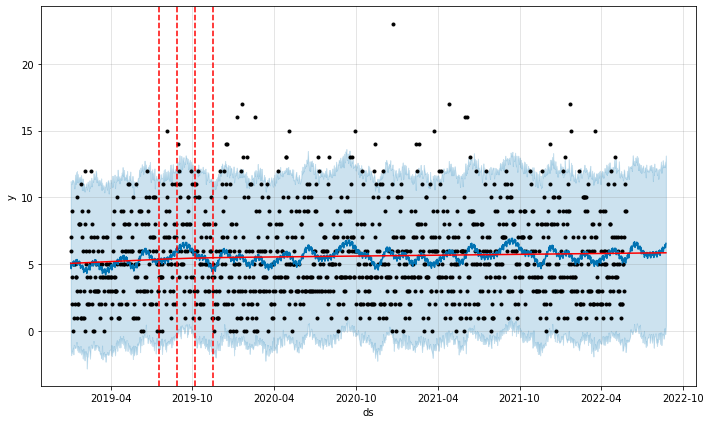

In [ ]:
plot1_email = m_email.plot(forecast_email);
a_email = add_changepoints_to_plot(plot1_email.gca(),m_email,forecast_email)

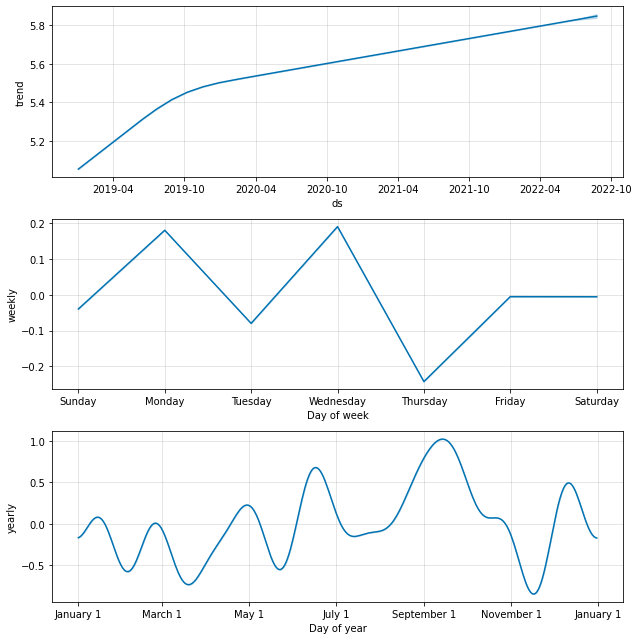

In [ ]:
plot2_email = m_email.plot_components(forecast_email);

# **5. Evaluation**


## Evaluation forecast per day

In [ ]:
df_merge = pd.merge(df_day, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2019-01-02,85.098332,140.183610,113.735525,90
1,2019-01-03,85.206304,143.206412,112.456638,109
2,2019-01-04,86.726564,139.335116,112.774349,105
3,2019-01-05,85.605581,143.231259,113.827777,127
4,2019-01-06,86.494176,142.691066,113.386243,107


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
# calculate MAE between observed and predicted values 
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
mape_01 = mean_absolute_percentage_error(y_true, y_pred)
print(mae_01)
print(mape_01)

11.528820603927159
0.1051863263956317


## Evaluation forecast per trafffic source

### Display

In [ ]:
df_merge_dp = pd.merge(df_display, forecast_dp[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge_dp = df_merge_dp[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge_dp.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2019-01-02,-1.753220,9.505088,3.877728,7.0
1,2019-01-03,-0.829041,10.043396,4.530550,3.0
2,2019-01-04,-1.814392,9.291513,4.099584,4.0
3,2019-01-05,-1.413446,9.308225,4.059739,4.0
4,2019-01-06,-1.133990,10.037220,4.326908,6.0


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
# calculate MAE between observed and predicted values 
y_true_dp = df_merge_dp['y'].values
y_pred_dp = df_merge_dp['yhat'].values
mae_dp = mean_absolute_error(y_true_dp, y_pred_dp)
mape_dp = mean_absolute_percentage_error(y_true_dp, y_pred_dp)
print(mae_dp)
print(mape_dp)

2.254232110152833
796481913293867.0


### Facebook

In [ ]:
df_merge_fb = pd.merge(df_fb, forecast_fb[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge_fb = df_merge_fb[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge_fb.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2019-01-02,0.635595,14.713030,7.595720,2.0
1,2019-01-03,-0.250577,14.522723,7.039699,18.0
2,2019-01-04,0.163566,14.292467,7.209673,2.0
3,2019-01-05,0.507490,15.461266,7.532033,10.0
4,2019-01-06,-0.428968,14.441847,6.732642,7.0


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
# calculate MAE between observed and predicted values 
y_true_fb = df_merge_fb['y'].values
y_pred_fb = df_merge_fb['yhat'].values
mae_fb = mean_absolute_error(y_true_fb, y_pred_fb)
mape_fb = mean_absolute_percentage_error(y_true_fb, y_pred_fb)
print(mae_fb)
print(mape_fb)

2.9381709648964462
317329643288630.1


### Organic

In [ ]:
df_merge_organic = pd.merge(df_organic, forecast_organic[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge_organic = df_merge_organic[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge_organic.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2019-01-02,7.671646,29.987524,18.212759,13
1,2019-01-03,7.055532,28.627928,18.074864,11
2,2019-01-04,7.210417,28.665595,18.123804,25
3,2019-01-05,6.317882,29.453469,17.758932,18
4,2019-01-06,7.485821,29.285296,17.928421,14


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
# calculate MAE between observed and predicted values 
y_true_organic = df_merge_organic['y'].values
y_pred_organic = df_merge_organic['yhat'].values
mae_organic = mean_absolute_error(y_true_organic, y_pred_organic)
mape_organic = mean_absolute_percentage_error(y_true_organic, y_pred_organic)
print(mae_organic)
print(mape_organic)

4.530866139195346
0.3285911940947569


### Search

In [ ]:
df_merge_search = pd.merge(df_search, forecast_search[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge_search = df_merge_search[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge_search.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2019-01-02,56.175104,103.674531,78.848473,62
1,2019-01-03,56.268127,100.924096,78.032477,70
2,2019-01-04,55.857340,101.832179,78.306851,70
3,2019-01-05,55.837779,104.383082,79.419099,93
4,2019-01-06,54.940299,103.779208,79.352676,71


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
# calculate MAE between observed and predicted values 
y_true_search = df_merge_search['y'].values
y_pred_search = df_merge_search['yhat'].values
mae_search = mean_absolute_error(y_true_search, y_pred_search)
mape_search = mean_absolute_percentage_error(y_true_search, y_pred_search)
print(mae_search)
print(mape_search)

9.679464916751483
0.1273418363768338


### Email

In [ ]:
df_merge_email = pd.merge(df_email, forecast_email[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge_email = df_merge_email[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge_email.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2019-01-02,-1.065924,11.206246,5.080293,6.0
1,2019-01-03,-1.816142,11.023519,4.660472,7.0
2,2019-01-04,-1.490032,11.003694,4.916118,4.0
3,2019-01-05,-1.628030,11.301554,4.938075,2.0
4,2019-01-06,-1.428180,11.186487,4.929156,9.0


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
# calculate MAE between observed and predicted values 
y_true_email = df_merge_email['y'].values
y_pred_email = df_merge_email['yhat'].values
mae_email = mean_absolute_error(y_true_email, y_pred_email)
mape_email = mean_absolute_percentage_error(y_true_email, y_pred_email)
print(mae_email)
print(mape_email)

2.571626513620058
622431565690060.4
